## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

Implemente uma rede neural que seja capaz de classificar corretamente os dados, utilizando como parâmetro seu proprio RM (identificador de aluno).

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



In [1]:
### Execute essa celula, mas não altere essa função

import numpy as np
import matplotlib.pyplot as plt

def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

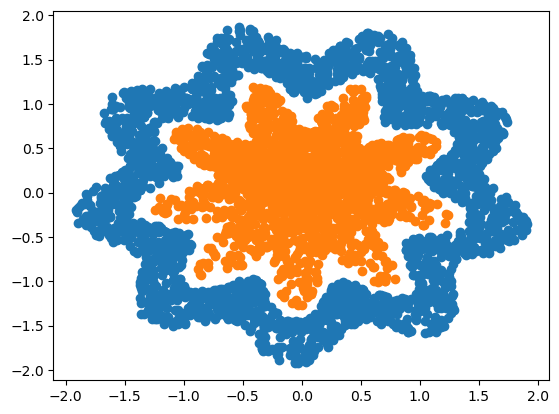

In [2]:
## Coloque seu RM aqui

RM = [9,3,4,8,0]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#Gerando os dados

c1, c2 = generate_data(nData,nVertices)

#Plot dos dados

plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

plt.show()

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:

    - Estrutura do código;
    - Testes realizados;
    - Número de neurônios;
    - Número de camadas em cada neurônio;
    - Algorítmo de adaptação;
    - Partâmetros do algoritmo de adaptação;
    - Função de ativação.

### Pré-processamento

In [4]:
# Imports

import pandas as pd
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

#### Separação

In [83]:
# Preparando os dados X e Y

x = np.concatenate((c1, c2), axis=0)
y = np.concatenate((np.zeros(nData), np.ones(nData)), axis=0)

# Separando os dados de treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Construção do modelo

In [84]:
# Criação dos neurônios do modelo

model = keras.Sequential([

    layers.Dense(16, input_shape=(2,)),

    layers.Dense(8, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

# Compilação do modelo

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Exubindo o resumo do modelo

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                48        
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


### Treino

In [85]:
# Treinamento do modelos

history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Modelo de treino

train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print(f'Acurácia Treino: {train_acc}')

# Modelo de teste

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'Acurácia Teste: {test_acc}')


Epoch 1/15
96/96 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.6602 - val_loss: 0.5612 - val_accuracy: 0.7695
Epoch 2/15
96/96 [==============================] - 0s 979us/step - loss: 0.5131 - accuracy: 0.8327 - val_loss: 0.4751 - val_accuracy: 0.8633
Epoch 3/15
96/96 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8919 - val_loss: 0.3842 - val_accuracy: 0.9193
Epoch 4/15
96/96 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.9284 - val_loss: 0.2995 - val_accuracy: 0.9414
Epoch 5/15
96/96 [==============================] - 0s 968us/step - loss: 0.2684 - accuracy: 0.9456 - val_loss: 0.2353 - val_accuracy: 0.9609
Epoch 6/15
96/96 [==============================] - 0s 968us/step - loss: 0.2152 - accuracy: 0.9564 - val_loss: 0.1882 - val_accuracy: 0.9701
Epoch 7/15
96/96 [==============================] - 0s 979us/step - loss: 0.1789 - accuracy: 0.9596 - val_loss: 0.1590 - val_accuracy: 0.9674
Epoch 8/15
9

### Avaliação de Resultados

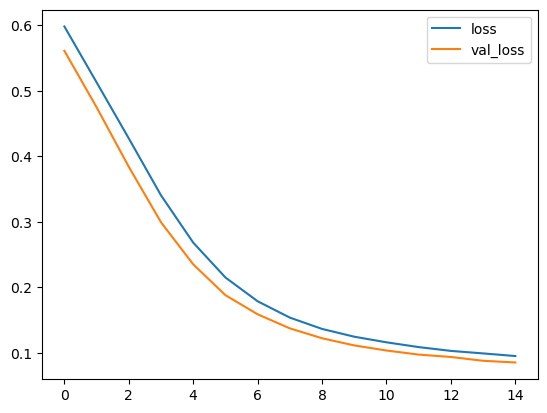

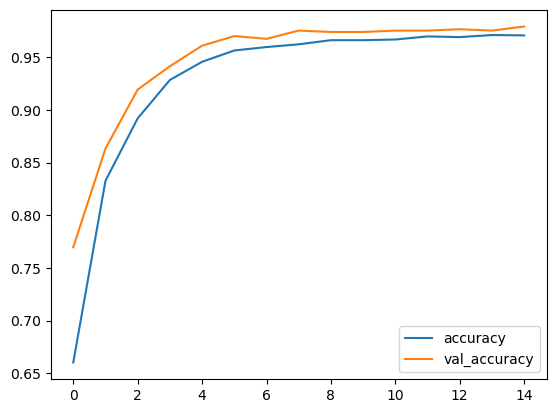

In [86]:
## Exibindo os gráficos das funções Loss e Accuracy

history_df = pd.DataFrame(history.history)

history_df[['loss','val_loss']].plot();
history_df[['accuracy','val_accuracy']].plot();

In [89]:
y_pred = np.round(model.predict(x_test))
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Calculando os resultados

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Exibindo os resultados

print(f"Acurácia: {accuracy:.3f}")
print(f"Precisão: {precision:.3f}")
print(f"Revocação: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

30/30 [==============================] - 0s 759us/step
Acurácia: 0.975
Precisão: 0.976
Revocação: 0.975
F1-Score: 0.975


### Resultados Finais

- Funções de Ativação: 'relu' e 'sigmoid'
- Optimizador: 'adam'
- Perda: 'binary_crossentropy'
- Métricas: ['accuracy']

- Total de Camadas: 3
- Total de Parâmetros: 193
- Acurácia: 0.975

### Considerações

Pontos observados durante o projeto:

    - Não houveram mudanças significativas na precisão do modelo ao utilizar mais de 3 camadas de neurônios;

    - Foi definido o uso de camadas com densidade (16, 8 e 1) pois valores inferiores a este diminuiam drasticamente a precisão do modelo e valores superiores não geravam melhorias significativas;

    - O uso de Dropout e BatchNormalization acabavam por diminuir a precisão do modelo, logo, seu uso foi descartado;
    
    - Não houveram mudanças significativas na precisão do modelo ao treinar mais de 15 épocas.